[IPython Notebook](limb_darkening.ipynb) |  [Python Script](limb_darkening.py)

Limb Darkening (not yet fully-implemented)
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe2
from phoebe2 import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe2.utils.get_basic_logger(clevel='INFO')

b = phoebe2.Bundle.default_binary()

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


We'll just add LC and MESH datasets

In [3]:
b.add_dataset('LC', time=np.linspace(0,3,101), dataset='lc01')

<ParameterSet: 18 parameters | methods: LC, LC_dep>

In [4]:
b.add_dataset('MESH', time=[0.75], datset='mesh01')

<ParameterSet: 1 parameters>

Relevant Parameters
-----------------------------

In [5]:
print b['ld_func_bol@primary']

Qualifier: ld_func_bol
Description: Bolometric limb darkening model
Value: logarithmic
Choices: uniform, linear, logarithmic, quadratic, square_root, power, claret, hillen, prsa


In [6]:
print b['ld_func_bol@primary'].choices

['uniform', 'linear', 'logarithmic', 'quadratic', 'square_root', 'power', 'claret', 'hillen', 'prsa']


In [7]:
print b['ld_coeffs_bol@primary']

Qualifier: ld_coeffs_bol
Description: Bolometric limb darkening coefficients
Value: [ 0.5  0.5]
Constrained by: 
Constrains: None
Related to: None


Influence on Light Curves (fluxes)
--------------------------

**TODO:** vary over different ld_func or ld_coeffs and show how they affect the LC

In [8]:
b.run_compute(model='mymodel')

/home/kyle/.local/lib/python2.7/site-packages/phoebe2/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe2/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe2/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe2/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe2/backend/eclipse.py:10: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  

<ParameterSet: 64 parameters | methods: MESH, LC>

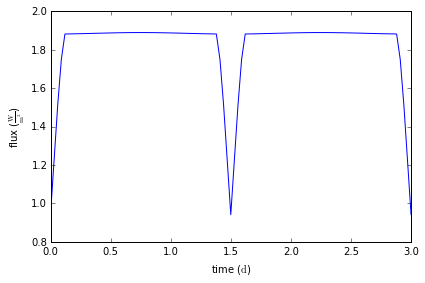

In [9]:
axs, artists = b['lc01@mymodel'].plot()

Influence on Meshes (Intesities)
-----------------------------------------

**TODO**: vary over different ld_func or ld_coeffs and show how they affect values and plots

/home/kyle/.local/lib/python2.7/site-packages/phoebe2/frontend/plotting.py:240: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/home/kyle/.local/lib/python2.7/site-packages/phoebe2/frontend/plotting.py:240: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


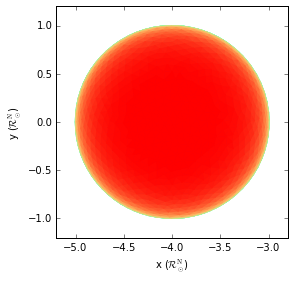

In [10]:
axs, artists = b['primary@MESH@mymodel'].plot(facecolor='ld', edgecolor=None)